<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_python_visualization_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Data Visualization with Python**
# Section 3. Pie charts, Box plots, Scatter plots and Bubble Plots

## Table of Contents
1. Exploring Datasets with *pandas*
2. Downloading and Prepping Data
3. Visualizing Data using Matplotlib
4. Pie Charts
5. Box Plots
6. Scatter Plots
7. Bubble Plots

---

### Exploring Datasets with *pandas* and Matplotlib

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website.

---

### Downloading and Prepping Data

In [0]:
import numpy as np
import pandas as pd

In [46]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [47]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [48]:
print(df_can.shape)

(195, 43)


In [49]:
# clean up the dataset to remove unnecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# for sake of consistency, also make all column labels of type strings
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly lookin gup countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


---

### Visualizing Data using Matplotlib

In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.2.1


---

### Pie chart

Let's use a pie chart to explore **the proportion (percentage) of new immigrants** grouped by continents for the entire time period from 1980 to 2013.

#### step 1. Gather Data
we will use `groupby` method to summarize the immigration data by `Continent`. The general proess of `groupby` involves the following steps:

1. split: splitting the data into groups based on some criteria.

2. apply: applying a function to each group independently.

3. combine: combining the results into a data structure.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">

In [51]:
# group countries by continents and apply sum function
df_continents = df_can.groupby('Continent', axis=0).sum()

# note : the output of the groupby method is a 'groupby' object
# we cannot use it further until we apply a function
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


#### step 2. plot the data.
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

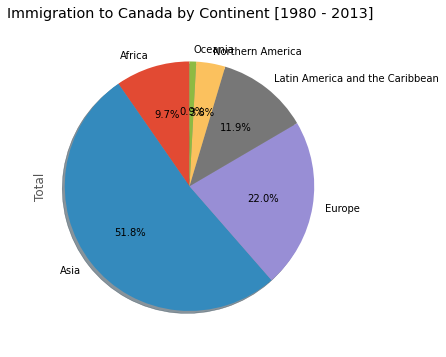

In [52]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # sets the pie chart to look like a circle.

plt.show()

the above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

- remove the text labels on the pie chart by passing in `legend` and add is as a seperate legend using `plt.legend()`.

- push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.

- pass in a custom set of colors for continents by passing in `colors` parameter.

- Explode the pie chart to emphasize the lowest three continents (Africa, North America and Latin America and Carribbean) by pasing in `explode` parameter.

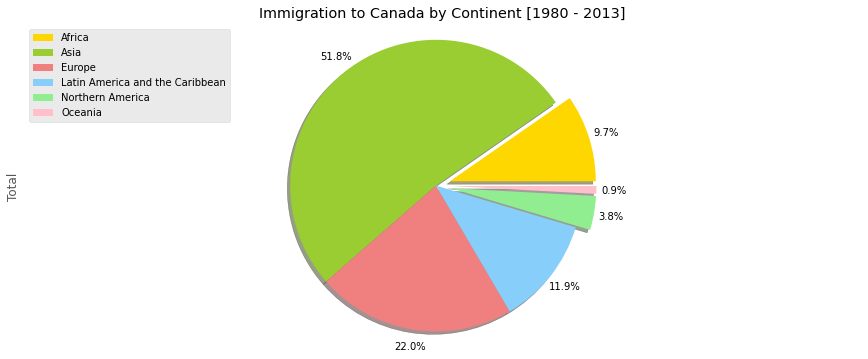

In [53]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            shadow=True,
                            labels=None, # turn off labels on pie chart
                            pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

Q. using a pie chart, explore the proportion of new immigrants grouped by continents in the year 2013.

Note: you might need to play with the explore values in order to fix any overlapping slice values.

In [54]:
df_continents_2013 = df_continents['2013']
df_continents_2013

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

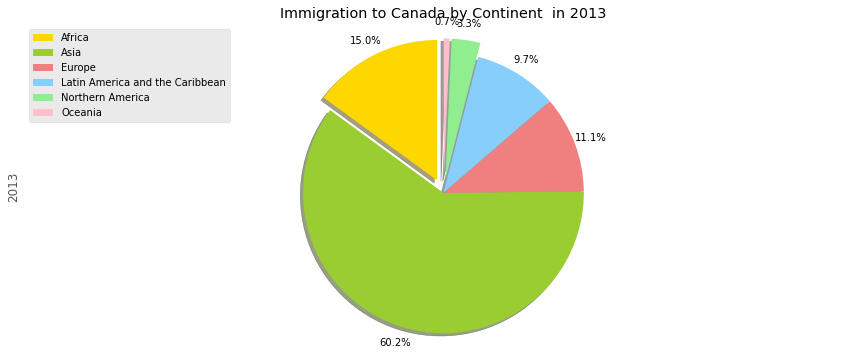

In [55]:
df_continents_2013.plot(kind='pie',
                        figsize=(15,6),
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                        labels=None,
                        pctdistance=1.12,
                        colors=colors_list,
                        explode=explode_list
                        )

plt.title('Immigration to Canada by Continent  in 2013')
plt.axis('equal') # sets the pie chart to look like a circle.
plt.legend(labels=df_continents_2013.index, loc='upper left')
plt.show()

---

### Box plots

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

Q. Let's plot the box plof for the Japanese immigrants between 1980 - 2013.

#### step 1. get the dataset.

In [56]:
# to get a dataframe, place extra square brackets around 'Japan'
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


#### step 2. plot by passing in `kind=box`

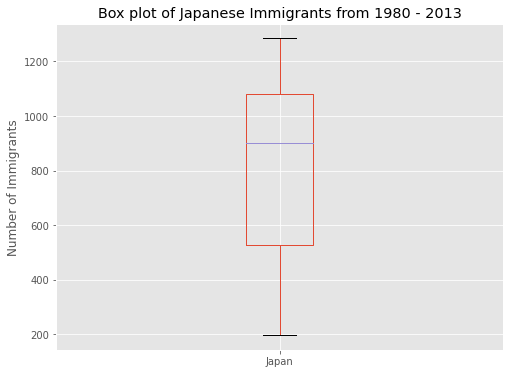

In [57]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

we can immediately make a few key observations from the plot above:

1. the minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).

2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~ 500 or fewer (1st quartile).

3. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~ 1100 or fewer (3rd quartile).

In [58]:
# we can view the actual numbers by calling the `describe` method
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Q. Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [59]:
# step 1. get the dataset for china and india and call the dataframe df_CI
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [60]:
# view the percentages associated with both countries using `describe()` method
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


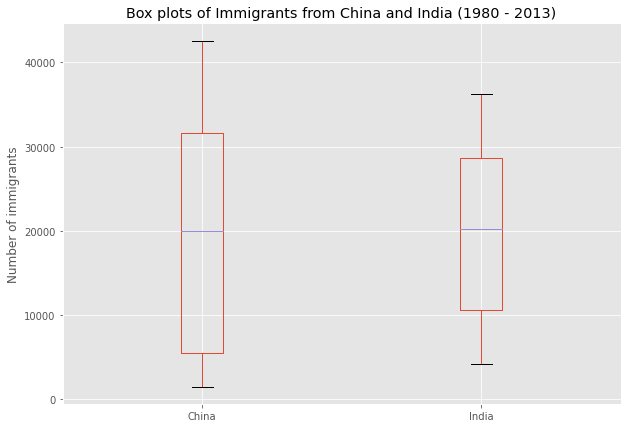

In [61]:
# step 2. plot data
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of immigrants')

plt.show()

#### Horizontal box plots

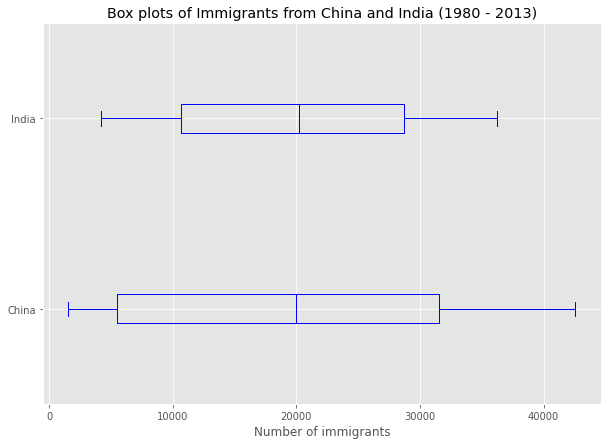

In [62]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of immigrants')

plt.show()

#### Subplots

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot.

With subplots, we usually work with the artist layer instead of the scripting layer.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

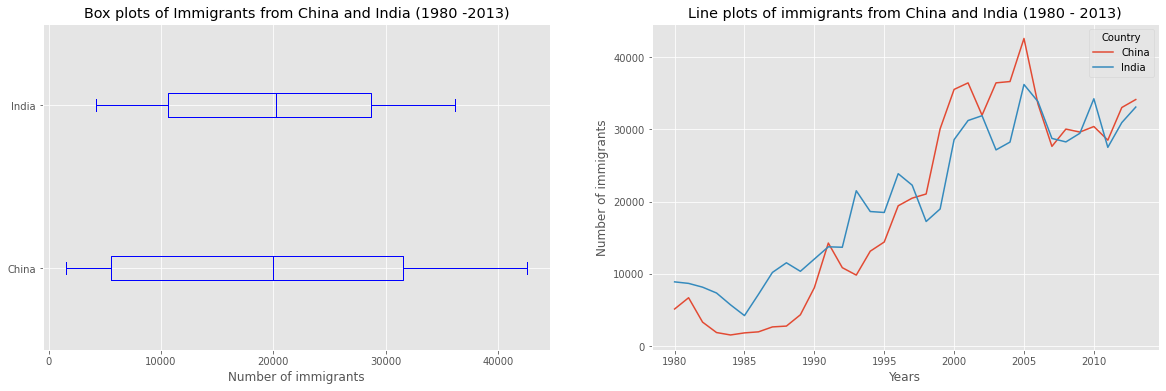

In [63]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# subplot 1: box plot
df_CI.plot(kind='box',
           color='blue',
           vert=False,
           figsize=(20, 6),
           ax=ax0)
ax0.set_title('Box plots of Immigrants from China and India (1980 -2013)')
ax0.set_xlabel('Number of immigrants')

# subplot 2: line plot
df_CI.plot(kind='line',
           figsize=(20, 6),
           ax=ax1)
ax1.set_title('Line plots of immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of immigrants')

plt.show()

Q. create a box plot to visualize the distribution of the top 15 countries(based on total immigrantion) grouped by the decades 1980s, 1990s and 2000s.

In [64]:
# step 1. get the dataset. get the top 15 countries based on Total immigrants population. Name the dataframe df_top15
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [0]:
# step 2. create a new dataframe which contains the aggregate for each decade.
# 1. create a list of all years in decades 80s,90s and 00s

list_80s = list(map(str, range(1980, 1989)))
list_90s = list(map(str, range(1990, 1999)))
list_00s = list(map(str, range(2000, 2013)))

In [0]:
# 2. slice the original dataframe df_can to create a series for each decade and sum across all years for each country
df_top15_80s = df_top15.loc[:, list_80s].sum(axis=1)
df_top15_90s = df_top15.loc[:, list_90s].sum(axis=1)
df_top15_00s = df_top15.loc[:, list_00s].sum(axis=1)

In [67]:
# 3. merge the three series into a new dataframe. call your dataframe new_df
new_df = pd.DataFrame({'1980s':df_top15_80s, '1990s':df_top15_90s, '2000s':df_top15_00s})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,71811,161421,396268
China,27680,131459,432302
United Kingdom of Great Britain and Northern Ireland,155376,254921,104536
Philippines,48899,128748,282601
Pakistan,8330,55323,153104


In [68]:
# learn more about the statistics associated with the dataframe using the `dataframe()` method
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,37555.600000,78067.933333,127890.933333
std,38632.337084,64095.522153,133672.167130
min,6031.000000,26685.000000,15923.000000
25%,14042.500000,37139.000000,44912.500000
50%,27634.000000,51719.000000,83624.000000
75%,45238.000000,97093.500000,128820.000000
max,155376.000000,254921.000000,432302.000000


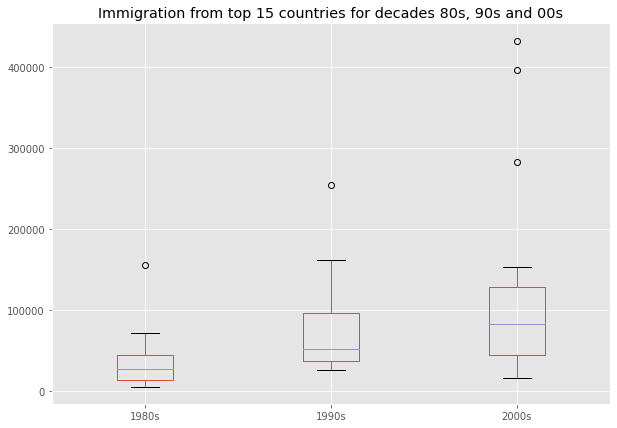

In [69]:
# step 3. plot the box plots
new_df.plot(kind='box', figsize=(10, 7))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 00s')
plt.show()

In [70]:
# let's check how many entries fall above the outlier threshold
new_df[new_df['2000s'] > 209611.5] # Q3 + 1.5 * IQR

,1980s,1990s,2000s
Country,,,
India,71811,161421,396268
China,27680,131459,432302
Philippines,48899,128748,282601


---

### Scatter plots

Q. using a `scatter plot`, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

#### step 1. get the dataset.

In [71]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


#### step 2. plot the data.
we'll need to pass in x and y keywords to specify the columns that go on the x- and y-axis.

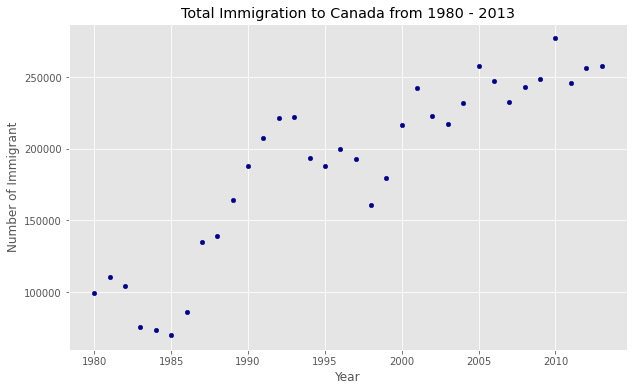

In [72]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrant')

plt.show()

Q. let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

In [73]:
# step 1. get the equation of line of best fit.
# deg: degree of fitting polynomial. 1=linear, 2=quadratic, and so on.

x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

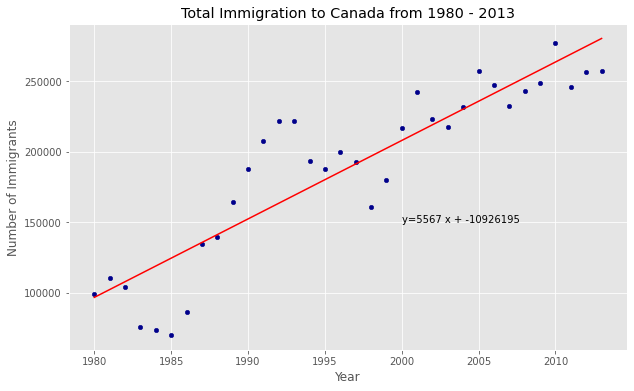

'No. Immigrants = 5567 * Year + -10926195'

In [74]:
# step 2. plot the regression line on the scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

No. Immigrants = 5567 * Year - 10926195

No. Immigrants = 5567 * 2015 - 10926195

**No. Immigrants = 291,310**

Q. Create a scatter plot of the total immigration from Denmark, Norway and Sweden to Canada from 1980 to 2013?

In [75]:
# step 1. get the data
# create a dataframe the consists of the numbers associated with Denmark, Norway and Sweden only. Name it df_countries.
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [76]:
# sum the immigration numbers across all three countries for each year
# and turn the result into a dataframe. Name this new dataframe df_total
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [77]:
# reset the index in place
df_total.reset_index(inplace=True)
df_total.head()

,index,0
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [0]:
# rename columns
df_total.columns = ['year', 'total']

In [0]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

In [80]:
# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


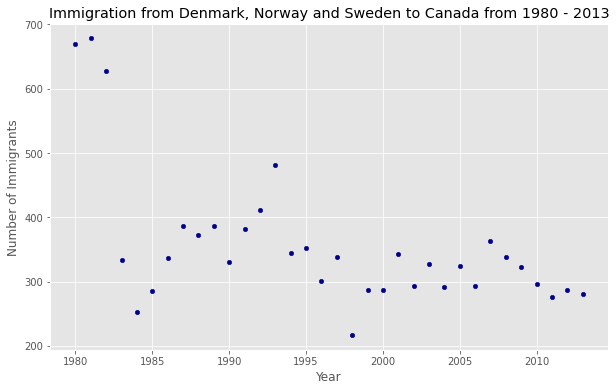

In [81]:
# step 2. generate the scatter plot by plotting the total versus year in df_total
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

---

### Bubble plots

**Q. Let's start by analyzing the effect of Argentina's great depression.**

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

#### step 1. get the data for brazil and argentina.

like in the previous example, we will convert the `Years` to type int and bring it in the dataframe.

In [82]:
df_can_t = df_can[years].transpose()

df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,"China, Hong Kong Special Administrative Region","China, Macao Special Administrative Region",...,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,702,234,0,26,0,83,372,0,511,16,2,0,44,0,10,211,79,24,2,0,1,12,9,0,4,0,1233,5123,0,0,...,6,241,0,0,7,1026,211,185,0,20,15,4,281,806,315,0,56,0,5,2,958,58,481,0,0,13,0,0,22045,635,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,639,238,0,23,2,84,376,0,540,27,5,0,52,0,1,220,6,20,1,0,1,19,2,0,3,0,1069,6682,0,0,...,6,301,0,0,10,1118,299,371,0,12,10,1,308,811,419,0,53,0,5,4,947,51,874,0,1,16,0,2,24796,832,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,484,201,0,38,1,86,299,0,519,13,4,0,42,0,3,192,8,12,3,0,2,26,16,0,1,1,1078,3308,0,0,...,7,337,0,0,7,781,260,290,0,11,21,1,222,634,409,0,113,0,2,7,972,55,706,0,0,17,0,2,20620,621,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,317,117,0,12,1,81,244,0,297,21,3,0,49,0,3,139,2,33,2,0,0,33,7,0,0,0,781,1863,0,0,...,3,169,0,0,12,379,133,197,0,7,12,0,176,370,269,0,65,0,3,1,766,46,280,0,0,38,0,1,10015,474,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,317,127,0,21,1,98,265,0,183,37,4,1,38,0,7,145,2,11,3,1,11,10,8,0,0,0,681,1527,0,0,...,12,128,0,0,14,271,137,1086,0,23,5,10,128,326,264,0,82,0,6,2,606,51,338,0,1,32,0,2,10170,473,6661,90,0,0,142,7583,0,0,16,32


#### step 2. create the normalized weights.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

In [0]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

#### step 3. plot the data.

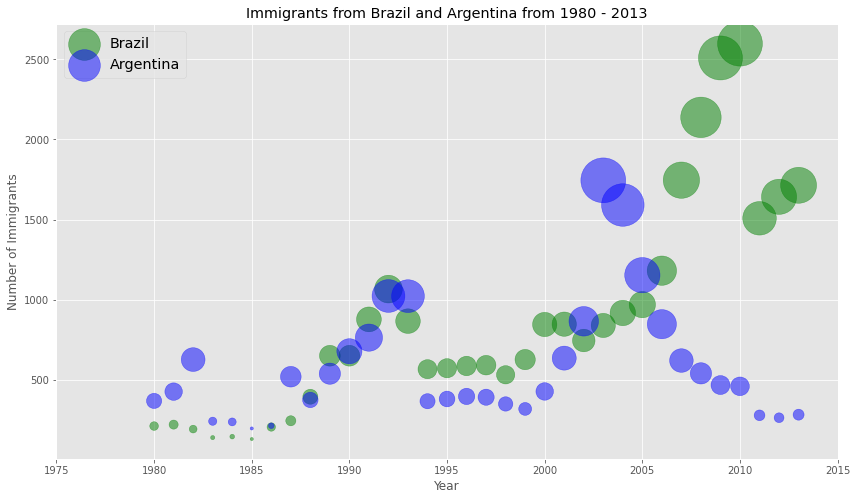

In [84]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5, # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10, # pass in weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='blue',
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Number of Immigrants') 
ax0.set_title('Immigrants from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')
